In [1]:
import sys  
sys.path.insert(0, '../')
sys.path.insert(0, '../src')

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from matplotlib import colors

from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    accuracy_score,
    confusion_matrix,
    multilabel_confusion_matrix,
)

import importlib

from src import network
from src.utils import SingleClassError, MultiClassError, one_hot_encoder
from src.activation_functions import Sigmoid, ReLU


mpl.rcParams["figure.dpi"] = 200
mpl.rcParams["figure.figsize"] = 10, 5

In [2]:
mnist_train = pd.read_csv('../data/mnist/train.csv')

y_train = one_hot_encoder(mnist_train[:30000]['label'].to_numpy())
x_train = mnist_train[:30000].drop(['label'], axis=1).to_numpy()
x_train = (x_train / 255)*.1 # type: ignore

y_valid = one_hot_encoder(mnist_train[30000:36000]['label'].to_numpy())
x_valid = mnist_train[30000:36000].drop(['label'], axis=1).to_numpy()
x_valid = (x_valid / 255)*.1  # type: ignore

y_test = one_hot_encoder(mnist_train[30000:36000]['label'].to_numpy())
x_test = mnist_train[30000:36000].drop(['label'], axis=1).to_numpy()
x_test = (x_test / 255)*.1  # type: ignore

In [3]:
importlib.reload(network)

net = network.Network(28*28)
net.add_layer(16, ReLU())
net.add_layer(16, ReLU())
net.add_output_layer(10, Sigmoid(a=0.005))

stats = net.train(
    x_train, y_train, x_valid, y_valid, 
    MultiClassError(),
    epochs=10, 
    eta=10e-3,
    verbose=True
    loss
)

TypeError: Network.train() missing 1 required positional argument: 'loss'

In [ ]:
predictions = []

for p in x_test:
    predictions.append(np.round(net.output(p)))

predictions = np.array(predictions) 

> Model accuracy: 89.0%. ROC AUC Score: 0.95


<AxesSubplot:>

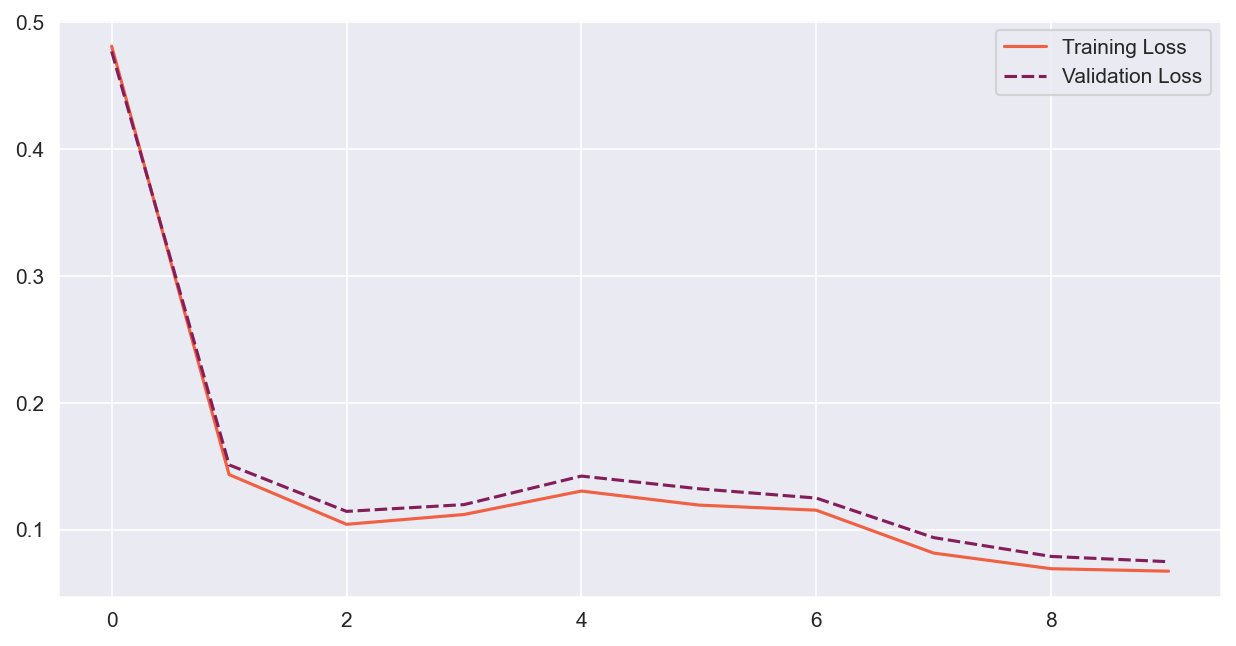

In [ ]:
accuracy = round(accuracy_score(y_test, predictions), 2)*100
roc = round(roc_auc_score(y_test, predictions), 2)

print(f'> Model accuracy: {accuracy}%. ROC AUC Score: {roc}')

losses = pd.DataFrame({'Training Loss':stats[0], 'Validation Loss':stats[1]})

palette = sns.color_palette("rocket_r", 2)
sns.set_style("darkgrid")
sns.lineplot(losses, palette=palette)

<AxesSubplot:>

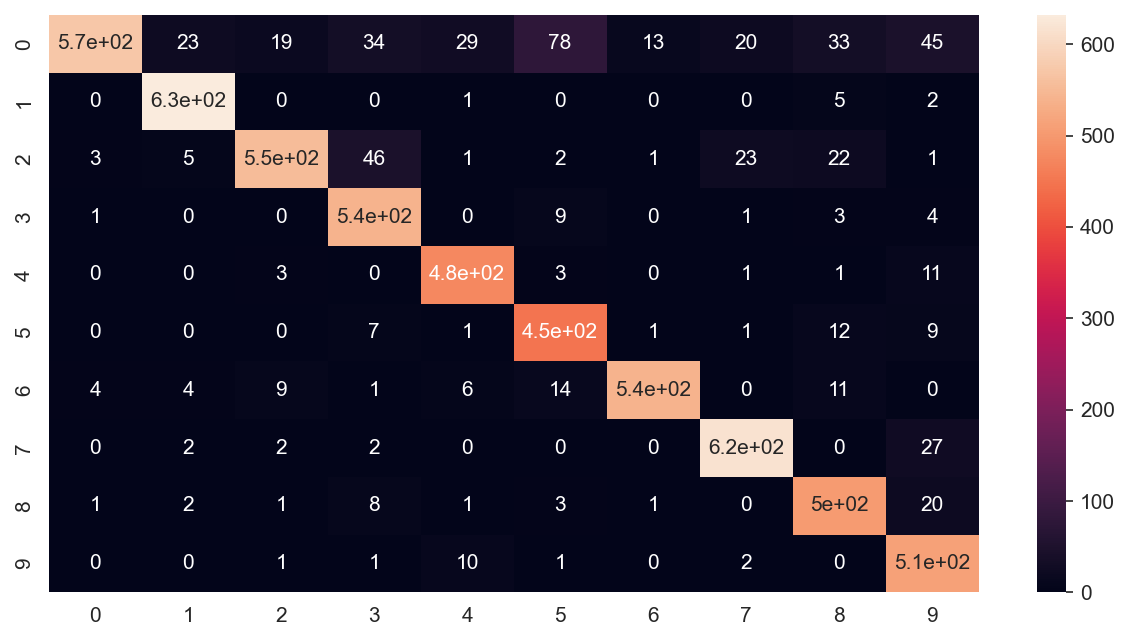

In [ ]:
labels_pred = np.argmax(predictions, 1)
labels_true = np.argmax(y_test, 1)

C = confusion_matrix(labels_pred, labels_true)
sns.heatmap(C, annot=True)

<AxesSubplot:>

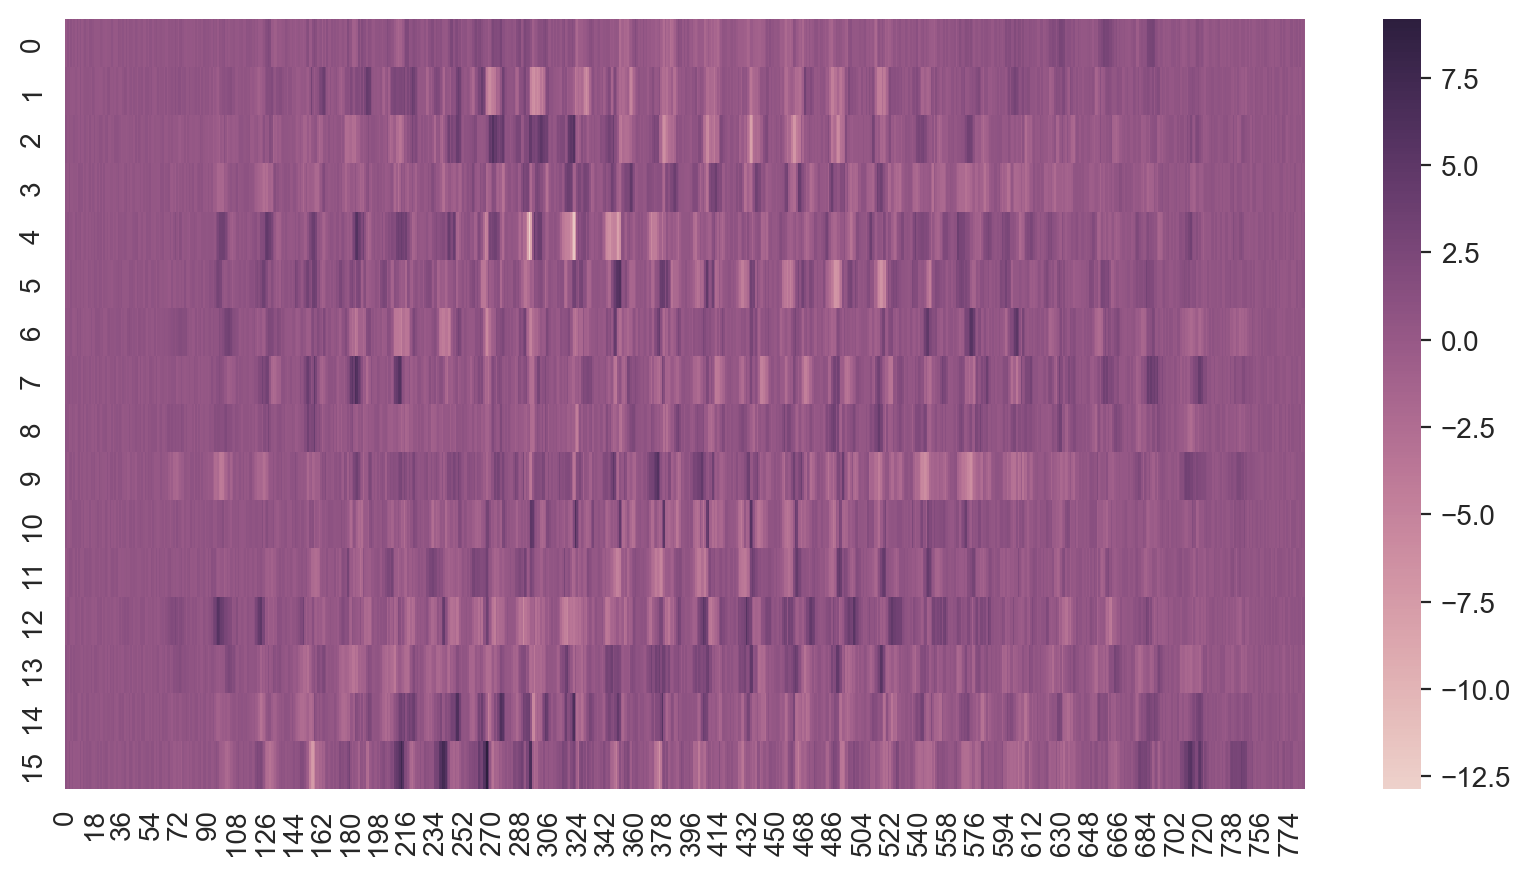

In [ ]:
sns.heatmap(net.layers[1].W, cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
